largest circle: center = (207, 210), radius = 11, sigma = 1.0


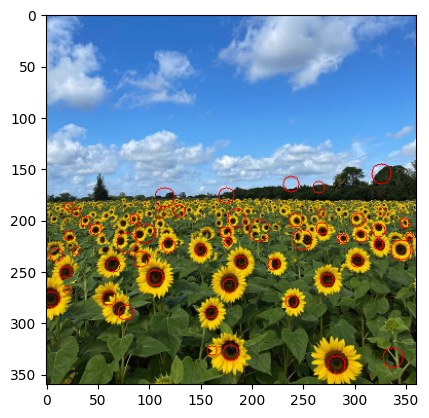

In [117]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sigma = np.arange(1, 10, 0.5)
threshold = 0.3

blob_markers = []
drawn_circles = []  # List to keep track of drawn circles (center, radius)

for j in sigma:
    blurred = cv.GaussianBlur(gray, (9, 9), sigmaX=j, sigmaY=j) 
    laplacian = cv.Laplacian(blurred, cv.CV_64F) #applying laplacian of gaussian
    absolute_laplacian = np.abs(laplacian)

    mask = absolute_laplacian > threshold * absolute_laplacian.max() #thresholding

    contours = cv.findContours(mask.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0] #finding contours

    for i in contours:
        if len(i) >= 25:  # considering significant contours draw cicrles
            (x, y), radius = cv.minEnclosingCircle(i) 
            center = (int(x), int(y)) 
            radius = int(radius)
            
            # Check for overlap with existing circles
            overlapping = False
            for drawn_circle in drawn_circles:
                existing_center, existing_radius, _ = drawn_circle
                distance = np.linalg.norm(np.array(center) - np.array(existing_center))
                if distance < (radius + existing_radius):
                    overlapping = True
                    break
            
            if not overlapping:
                cv.circle(img, center, radius, (0, 0, 255), 1)
                blob_markers.append((center, radius, j))
                drawn_circles.append((center, radius, j))

# Find the largest circle
largest = max(blob_markers, key=lambda x: x[1])
c, r, s = largest

print ('largest circle: center = {}, radius = {}, sigma = {}'.format(c, r, s))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
